In [6]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm



def a(x):
    if x==0:
        return 0
    else:
        return x/(2*x+1)

def b(x):
    if x==0:
        return 0
    else:
        return (x+1)/(2*x+1)

def g(x):
    if x==0:
        return 0
    else:
        return x*(x+1)/(2*x+1)

def func_h(x):
    if x==0:
        return 0
    else:
        return x*(x+1)
    
def alpha(x,a_profile):
    if a_profile == 'r':
        xa , xb , d = 0.675 , 0.725 , 0.05
        ans = ( 1 + math.erf( (x-xa) / d ) ) * ( 1 - math.erf( (x-xb) / d ) ) / 4
    elif a_profile == 'c':
        ans = 1
        
    return ans

def d_Omega_r(x):
    ans = 5 * 10**(-8) * math.pi**(0.5) * math.exp( - ( ( x - 0.7 ) / 0.04 )**2 )
    return ans





## Case1: $\frac{d\Omega}{dr}=\Omega^{'}$ & $\frac{d\Omega}{d\theta}=0$

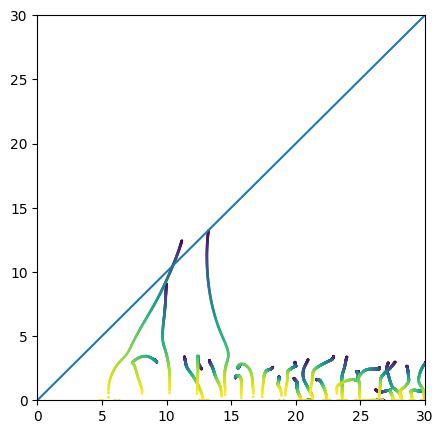

In [7]:
def generate(P,M,n,a_profile='r'):
    x0,xo=0.6,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 - ( h_2d + 2*h_d/xj )/( 1 + h*func_h(i+1) ) )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                elif i == n-1:
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                else:
                    matrix[row][col_next] = alpha(xj,a_profile) * b(i+2)
                    matrix[row][col_before] = alpha(xj,a_profile) * a(i)
                

            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = ( (h_2d-2*h_d/xj)/(1-h**2/xj) -1*( 2*h_2d + func_h( i+1 )/xj**2 ) )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - 2*h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + 2*h_d/xj
            
                col_next=row+(M-1)
                col_before=row-(M-1)
                if i == 0:
                    matrix[row][col_next]=-1*P*g(i+2)
                elif i == n-1:
                    matrix[row][col_before]=P*g(i)
                else:
                    matrix[row][col_next]=-1*P*g(i+2)
                    matrix[row][col_before]=P*g(i)

    return matrix


def get_eigvals(P,M,n,s='dont show',a_cfg='r'):
    matrix=generate(P,M,n,a_cfg)
    # print(matrix)

    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL,imL

def draw(ax,x,y,i,P):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)





# P=1
# M=4
# n=4
# ans = generate(P,M,n)
# np.set_printoptions(threshold=np.inf)
# for i in ans:
#     L=[ float(j) for j in list(i)] 
#     print(L)


# s='show'
s='dont show'
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
cmap = plt.cm.viridis
mini=-200000
maxi=0
M=10
n=15
a_cfg='r'
for P in range(mini,maxi,1000):
    norm = Normalize(vmin=mini, vmax=maxi)
    x,y = get_eigvals(P,M,n,s,a_cfg)
    # print(x,y)
    draw(ax,x,y,'n',P)

ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.plot([0,30],[0,30])
plt.show()
